## Approximate Forms of the Energy Conservation Equation in Rectangular, Cylindrical, and Spherical Coordinates (Thermal Effects Only)

Rectangular (x,y,z,t)
$$\frac{\partial T}{\partial t}+ v_x\frac{\partial T}{\partial x} + v_y\frac{\partial T}{\partial y}+v_z\frac{\partial T}{\partial z} = 
\alpha [\frac{\partial^2 T}{\partial x^2} + \frac{\partial^2 T}{\partial x^2}+ \frac{\partial^2 T}{\partial y^2} +
\frac{\partial^2 T}{\partial z^2}] + \frac{H_V}{\rho \hat{C_p}}$$

Cylindrical (r,$\theta$, z, t)
$$\frac{\partial T}{\partial t} + v_r \frac{\partial T}{\partial r} + \frac{v_\theta}{r}\frac{\partial T}{\partial \theta} + v_z\frac{\partial T}{\partial z} = \alpha [\frac{1}{r}\frac{\partial}{\partial r} (r\frac{\partial T}{\partial r} + \frac{1}{r^2}\frac{\partial^2 T}{\partial \theta^2} + \frac{\partial^2 T}{\partial z^2}] +  \frac{H_V}{\rho \hat{C_p}}$$

# 1. Diagram of Problem
![Capture](Capture.jpg)

# 2. Obtaining a mathematical expression for the unsolved differential equation
## Energy Conservation Equation with Thermal Effects Only in Cylindrical Coordinates

$$\frac{\partial T}{\partial t} + v_r \frac{\partial T}{\partial r} + \frac{v_\theta}{r}\frac{\partial T}{\partial \theta} + v_z\frac{\partial T}{\partial z} = \alpha [\frac{1}{r}\frac{\partial}{\partial r} (r\frac{\partial T}{\partial r} + \frac{1}{r^2}\frac{\partial^2 T}{\partial \theta^2} + \frac{\partial^2 T}{\partial z^2}] +  \frac{H_V}{\rho \hat{C_p}}$$

$H_V$: volumetric heating rate, $T$: temperature at radius $r$,$R$: radius of the cylinder, $R_o$ = $\frac{r}{R}$,

$\rho$: density,$\alpha$: heat diffusivity and $\alpha  = \frac{k}{\rho \hat{C_p}}$ where $k$: thermal conductivity and $\hat{C_p}$: specific heat capacity. 

$h$: heat transfer coefficient, $Bi$: Biot number, the ratio of the convection heat transfer rate at the surface of the body to the cunduction heat transfer rate within the body, in this case $Bi = \frac{hR}{2k}$


### Assuming steady state and accounting for symmetry we are left with:

**(1)** $$\alpha (\frac{1}{r}\frac{\partial}{\partial r}) (r\frac{\partial T}{\partial r}) -\frac{H_V}{\rho \hat{C_p}}=0$$

Using definition of $\alpha$ and multiplying by r

**(1a)**
$$\frac{\partial}{\partial r}(r \frac{\partial T}{\partial r}) + \frac{H_Vr}{k} = 0$$

# 3. An explanation of the expected behavior of the solution using the boundary conditions and initial conditions and stability theory

**Convection Boundary Condition:** Heat conduction at surface is equal to heat convection in same direction. No heat transport occurs if $T=T_o$. 

**(2)** $-k\frac{\partial T}{\partial r} = h( T-T_o)$

**(2a)** $\frac{\partial T}{\partial r} \Big\rvert_{r = R} = \frac{-h}{k}(T -T_o) \Big\rvert_{r = R}$


**Temperature constant at r = 0**

**(2b)** $\frac{\partial T}{\partial r} \Big\rvert_{r = 0} = 0$




# 4. A step-by-step solution of the differential equation using analytical methods

Separate (1a) and integrate:

$$\int \frac{\partial}{\partial r}(r \frac{\partial T}{\partial r}) = \int \frac{-H_Vr}{k}\\
r \frac{\partial T}{\partial r} = \frac{-H_Vr^2}{2k}+c_1$$
**(3)**

$$\frac{\partial T}{\partial r} = \frac{-H_Vr}{2k}+c_1$$ 

Applying boundary condition (2b) $\implies c_1 = 0$

Re-arrange, integrate:
$$\int \partial T = \int \frac{-H_Vr}{2k}\partial r $$
**(4)**
$$T(r, t = \infty) = \frac{-H_Vr^2}{4k} + c_2$$ 

Plug $\frac{\partial T}{\partial r}$ and $T$ back into boundary condition (2a) to obtain $c_2$:

$$\frac{-H_Vr}{2k} = \frac{-h}{k}(\frac{-H_Vr^2}{4k} + c_2 -T_o)\\
c_2 = \frac{H_V R}{2h} + \frac{H_V R^2}{4k}+T_o$$

Now substitute $c_2$ into (4). Then substitute (3) and (4) into (2) and rearrange.

$$\frac{(T-T_o)k}{R^2H_V} = \frac{k}{2RH_v} + \frac{1}{4} -\frac{r^2}{4R^2}$$

Use definition of Biot Number to rearrange: 

$$\frac{(T-T_o)k}{R^2H_V} = \frac{1}{4}(\frac{2}{Bi} + 1 - R_o^2)$$


# 5. A plot of the solution and an explanation of its behavior
Explanation: The ratio of the heat transfer rate due to convection vs due to conduction, is the Biot number. If heat is quickly transferred 

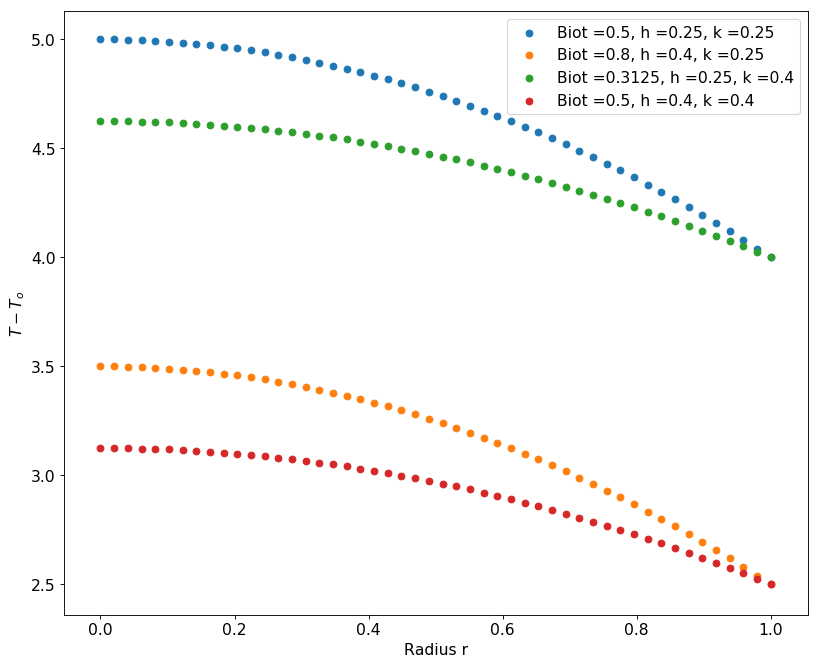

In [70]:
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 10), dpi=80)
plt.rcParams.update({'font.size': 14})


k_list = [0.25,0.4]
R_list = [1]
HV_list = [1]
h_list = [0.25,0.4]
def Ro(r,R):
    return r/R

def plotter(k,R,HV,h):
    deltaT_list =[]
    r_array = np.linspace(0,R,50)

    for r in r_array: 
        deltaT = (R**2 * HV)/(4*k)*((2/Bi)+1-(Ro(r,R)**2))
        deltaT_list.append(deltaT)
    plt.scatter(r_array,deltaT_list, label = 'Biot =' + str(Bi) +', h ='+str(h)+', k ='+str(k))
    plt.legend()
    plt.ylabel('$T-T_o$')
    plt.xlabel('Radius r')

for k in k_list:
    for R in R_list:
        for HV in HV_list:
            for h in h_list:
                Bi = h*R/(2*k)
                
                plotter(k,R,HV,h,)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

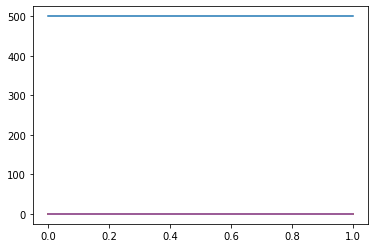

In [14]:
R = 1
r = np.linspace(0, 1, 101)

Bi = 1
q = 0.01
k = 1




fig, ax = plt.subplots(figsize=(6,4))

for Bi in [0.00001, 1, 10, 100, 10000]:
    rhs = 0.25*((2/Bi) + 1 - r**2)
    dT = rhs*q*R**2/k
    ax.plot(r, dT)

